In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from cv2 import imwrite,imread
from PIL import Image
import glob
import os

In [2]:

colormap = np.arange(0,90)
colormap = colormap.reshape(-1,3)
a=np.array([[1,2,3],[4,5,6]])
# a.shape
colormap[a]

array([[[ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20]]])

In [3]:
def create_pascal_label_colormap():
  """Creates a label colormap used in PASCAL VOC segmentation benchmark.

  Returns:
    A Colormap for visualizing segmentation results.
  """
  colormap = np.zeros((256, 3), dtype=int)
  ind = np.arange(256, dtype=int)

  for shift in reversed(range(8)):
    for channel in range(3):
      colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

  return colormap

In [4]:
def label_to_color_image(label):
  """Adds color defined by the dataset colormap to the label.

  Args:
    label: A 2D array with integer type, storing the segmentation label.

  Returns:
    result: A 2D array with floating type. The element of the array
      is the color indexed by the corresponding element in the input label
      to the PASCAL color map.

  Raises:
    ValueError: If label is not of rank 2 or its value is larger than color
      map maximum entry.
  """
  if label.ndim != 2:
    raise ValueError('Expect 2-D input label')

  colormap = create_pascal_label_colormap()

  if np.max(label) >= len(colormap):
    raise ValueError('label value too large.')

  return colormap[label]

In [5]:
LABEL_NAMES = np.asarray([
    'road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic light',
    'traffic sign', 'vegetation',  'terrain',
     'sky', 'person', 'rider', 'car',
      'truck', 'bus', 'train', 
     'motorcycle', 'bicycle'
])

# LABEL_NAMES = np.asarray([
#     'unlabeled', 'ego vehicle', 'out of roi', 'static', 'dynamic', 'ground', 'road',
#     'sidewalk', 'parking', 'rail track', 'building', 'wall', 'fence', 'guard rail', 'bridge',
#     'tunnel', 'pole', 'polegroup', 'traffic light', 'traffic sign', 'vegetation', 'terrain',
#      'sky', 'person', 'rider', 'car', 'truck', 'bus', 'caravan', 'trailer', 'train', 
#      'motorcycle', 'bicycle', 'license plate'
# ])

FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)
FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)
FULL_COLOR_MAP

array([[[  0,   0,   0]],

       [[128,   0,   0]],

       [[  0, 128,   0]],

       [[128, 128,   0]],

       [[  0,   0, 128]],

       [[128,   0, 128]],

       [[  0, 128, 128]],

       [[128, 128, 128]],

       [[ 64,   0,   0]],

       [[192,   0,   0]],

       [[ 64, 128,   0]],

       [[192, 128,   0]],

       [[ 64,   0, 128]],

       [[192,   0, 128]]])

In [22]:
def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

In [23]:
# MODEL = DeepLabModel(download_path)

In [66]:


imageset=glob.glob("/media/jialin/045E58135E57FC3C/UBUNTU/KITTI360/data_2d_raw/2013_05_28_drive_0010_sync/image_00/segmentation/*.png")
imageset_sorted=sorted(imageset)

image_count=len(imageset_sorted)

for img in imageset_sorted:
    cv_img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
   
    # imgu8 = convert(cv_img, 0, 255, np.uint8)
    imgu8 = cv_img+1
    # print(imgu8.dtype)
    # print("min", imgu8.min())
    # print("max", imgu8.max())
    # print(imgu8.shape)
    
  
    seg_map = label_to_color_image(imgu8).astype(np.uint8)
    # plt.imshow(seg_map)
    # # print(seg_map.dtype)
    # # seg_img_int8=np.uint8(seg_map)
    seg_im=Image.fromarray(seg_map)
    print(os.path.basename(img))

    

    seg_im.save(('/media/jialin/045E58135E57FC3C/UBUNTU/KITTI360/data_2d_raw/2013_05_28_drive_0010_sync/image_00/segmentation_rgb/'+os.path.basename(img)),"PNG")

    image_count=image_count-1
    # print(("./int8_result/"+os.path.basename(img)))
    print("{} {}".format(image_count, "iamges left"))
    # break


0000000000.png
3835 iamges left
0000000001.png
3834 iamges left
0000000002.png
3833 iamges left
0000000003.png
3832 iamges left
0000000004.png
3831 iamges left
0000000005.png
3830 iamges left
0000000006.png
3829 iamges left
0000000007.png
3828 iamges left
0000000008.png
3827 iamges left
0000000009.png
3826 iamges left
0000000010.png
3825 iamges left
0000000011.png
3824 iamges left
0000000012.png
3823 iamges left
0000000013.png
3822 iamges left
0000000014.png
3821 iamges left
0000000015.png
3820 iamges left
0000000016.png
3819 iamges left
0000000017.png
3818 iamges left
0000000018.png
3817 iamges left
0000000019.png
3816 iamges left
0000000020.png
3815 iamges left
0000000021.png
3814 iamges left
0000000022.png
3813 iamges left
0000000023.png
3812 iamges left
0000000024.png
3811 iamges left
0000000025.png
3810 iamges left
0000000026.png
3809 iamges left
0000000027.png
3808 iamges left
0000000028.png
3807 iamges left
0000000029.png
3806 iamges left
0000000030.png
3805 iamges left
00000000

In [22]:
label_dict={}
for i in np.arange(19):
    label_dict[LABEL_NAMES[i]] = read_img[i,0]

label_dict

{'road': 0,
 'sidewalk': 38,
 'building': 75,
 'wall': 113,
 'fence': 14,
 'pole': 52,
 'traffic light': 89,
 'traffic sign': 128,
 'vegetation': 19,
 'terrain': 57,
 'sky': 94,
 'person': 132,
 'rider': 33,
 'car': 72,
 'truck': 108,
 'bus': 147,
 'train': 37,
 'motorcycle': 75,
 'bicycle': 112}

In [12]:
a=np.arange(0,100)
a=a.reshape(50,2)


In [13]:
b=np.arange(20)
b=b.reshape(4,5)
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [16]:
a[b].shape

(4, 5, 2)

In [3]:
A=1000
cs = np.arange(0.01,1,0.01)
cs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

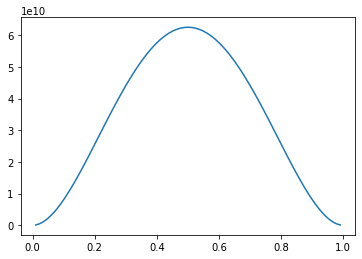

In [13]:
a=[]
for c in cs:
    result = c**2 * A**4 - 2*c**3*A**4 + c**4*A**4
    a.append(result)

a=np.array(a)
plt.plot(cs,a)

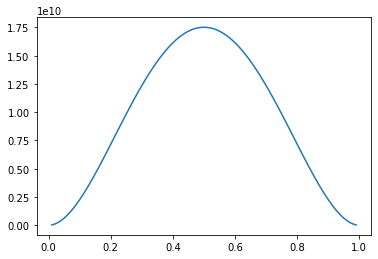

In [14]:
H=376
W=1408
a=[]
for c in cs:
    result = (H*W - c*H*W - c*H*W + c**2*H*W)*c**2*H*W
    a.append(result)

a=np.array(a)
plt.plot(cs,a)

In [4]:
H=376
W=1408
h=20
w=10
result = (H*W - h*W - H*w + h*w)*h*w
result *0.000016

1592.6016

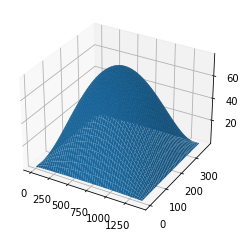

In [34]:
a=[]
for h in np.arange(1,H):
    for w in np.arange(1,W):
        # h=i*H
        # w=j*H
        result = (H*W - h*W - H*w + h*w)*h*w*0.000016/3600
        a.append(result)

a=np.array(a)
Z=a.reshape(H-1,W-1)
y=np.arange(1,H)
x=np.arange(1,W)
X,Y = np.meshgrid(x,y)




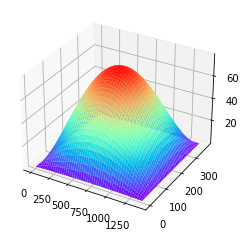

In [56]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap='rainbow')
# ax.contour(X,Y,Z)